![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('BBDD_Hospitalización.xlsx')



c:\Users\beren\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [2]:
# remplazar los valores de No en 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA' por nulos para trabajar con la columna
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].replace('NO',np.nan)
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'].astype(float)
#df['HOSPITALIZACION'].fillna(0, inplace=True)

reemplazos = {"NO": 0, "SI": 1}
columnas_a_reemplazar = ["DIABETES", "HOSPITALIZACIÓN ULTIMO MES", "BIOPSIAS PREVIAS",'VOLUMEN PROSTATICO','CUP','FIEBRE','ITU','HOSPITALIZACION']

df[columnas_a_reemplazar] = df[columnas_a_reemplazar].replace(reemplazos)
df[columnas_a_reemplazar].astype(bool)
df['HOSPITALIZACION'].value_counts()

#ELIMINAR FILAS CON MAS DE 10 NAN
df.dropna(thresh=10, inplace=True)


Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [3]:
#eliminar la variable enf. cronica pulmonar obstructiva porque no esta asociado a los factores 
#que puedan surgir como consecuencia de una biopsia prostatica
df.drop(["ENF. CRONICA PULMONAR OBSTRUCTIVA"], axis=1, inplace= True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568 entries, 0 to 567
Data columns (total 19 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    float64
 1   DIABETES                                                                   568 non-null    float64
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    float64
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    float64
 5   VOLUMEN PROSTATICO                                                         567 non-null    float64
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                        

Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [6]:
df[['EDAD', 'PSA','NUMERO DE MUESTRAS TOMADAS',
'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA']].describe()

,EDAD,PSA,NUMERO DE MUESTRAS TOMADAS,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA
count,568.000000,564.000000,568.000000,26.000000
mean,63.882042,13.271401,12.996479,2.884615
std,9.281517,15.668966,3.921180,2.084743
min,39.000000,0.600000,4.000000,1.000000
25%,59.000000,5.600000,12.000000,2.000000
50%,64.000000,8.000000,12.000000,2.000000
75%,69.000000,15.000000,12.000000,3.000000
max,151.000000,100.000000,24.000000,9.000000


In [7]:
#ver las relaciones entre las variables numericas
objects=['EDAD', 'PSA',
       'NUMERO DE MUESTRAS TOMADAS',
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA']
       #'DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC']
#sns.pairplot(df, vars=objects)

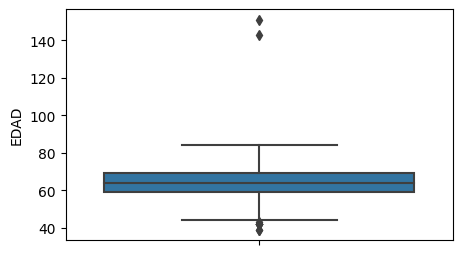

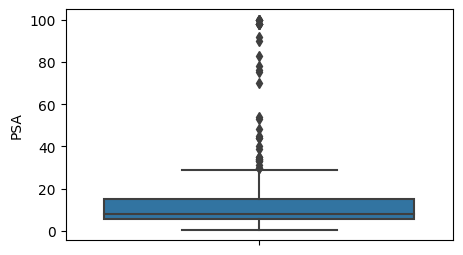

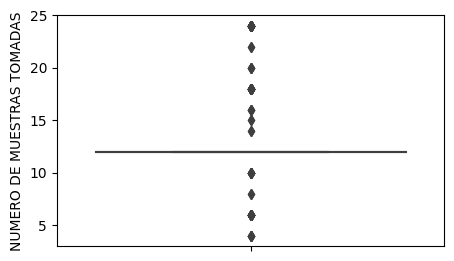

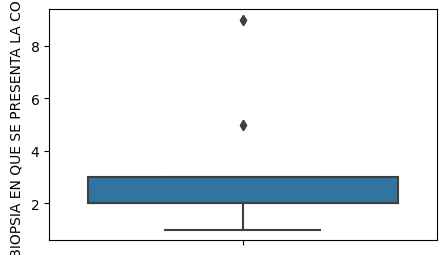

In [8]:
#ver los outliers con boxplot
for i in objects:
    plt.figure(figsize=(5,3))
    sns.boxplot(data=df,y=i)


In [9]:
#calcular bigote inferior y superior del psa
#min	0.600000	25%	5.600000	50%	8.000000	75%	15.000000	max	100.000000
Q1_PSA=5.6
Q3_PSA=15
IQR_PSA=9.4

BI=(Q1_PSA-1.5*IQR_PSA)
print("Bigote inferior es:\n",BI)
BS=(Q3_PSA+1.5*IQR_PSA)
print("Bigote superior es:\n",BS)


Bigote inferior es:
 -8.500000000000002
Bigote superior es:
 29.1


In [10]:
#ver los outliers
#La mediana del total de valores es 8
#guardar los outliers
df_outliers=df[df["PSA"]>29.1]
#reeplzar los valores ouliers por la mediana
df.loc[df["PSA"]>29.1, "PSA"]=8

In [11]:
#sin_outliers=df[(df["PSA"]>=BI) & (df["PSA"]<=BS)]
#sin_outliers.median()
df_outliers["PSA"]

27      91.8
29      98.0
34      90.0
40     100.0
46      38.9
48      40.0
56      53.0
77      98.0
111     98.0
114    100.0
154     33.6
157     48.3
171     31.0
175     83.0
202     33.8
210     30.0
219     43.9
270     33.0
274     76.0
304     70.0
310     54.0
331    100.0
366    100.0
369     98.0
409     33.8
412     45.0
428     35.0
432     98.0
459     33.0
467     30.0
476     44.0
527     35.0
531     78.0
561     75.0
Name: PSA, dtype: float64

In [12]:
df.describe()

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,CUP,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
count,568.000000,568.000000,568.000000,564.000000,566.000000,567.000000,568.000000,567.000000,26.000000,568.000000,568.000000,565.000000,568.000000,568.000000
mean,63.882042,0.110915,0.008803,9.943209,0.098940,0.719577,12.996479,0.007055,2.884615,0.065141,0.010563,0.042478,0.165493,0.014085
std,9.281517,0.314304,0.093492,6.292816,0.298845,0.449603,3.921180,0.083769,2.084743,0.246992,0.102324,0.201855,0.958066,0.196474
min,39.000000,0.000000,0.000000,0.600000,0.000000,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,0.000000,0.000000,5.600000,0.000000,0.000000,12.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,64.000000,0.000000,0.000000,8.000000,0.000000,1.000000,12.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,69.000000,0.000000,0.000000,12.600000,0.000000,1.000000,12.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,151.000000,1.000000,1.000000,29.000000,1.000000,1.000000,24.000000,1.000000,9.000000,1.000000,1.000000,1.000000,12.000000,3.000000


In [13]:
#ecnontrar la correlacion de las variablews numericas
numericas=['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'NUMERO DE MUESTRAS TOMADAS', 'CUP',
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
       'FIEBRE', 'ITU','HOSPITALIZACION',
       'DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC']

corr=df[numericas].corr()

<AxesSubplot: >

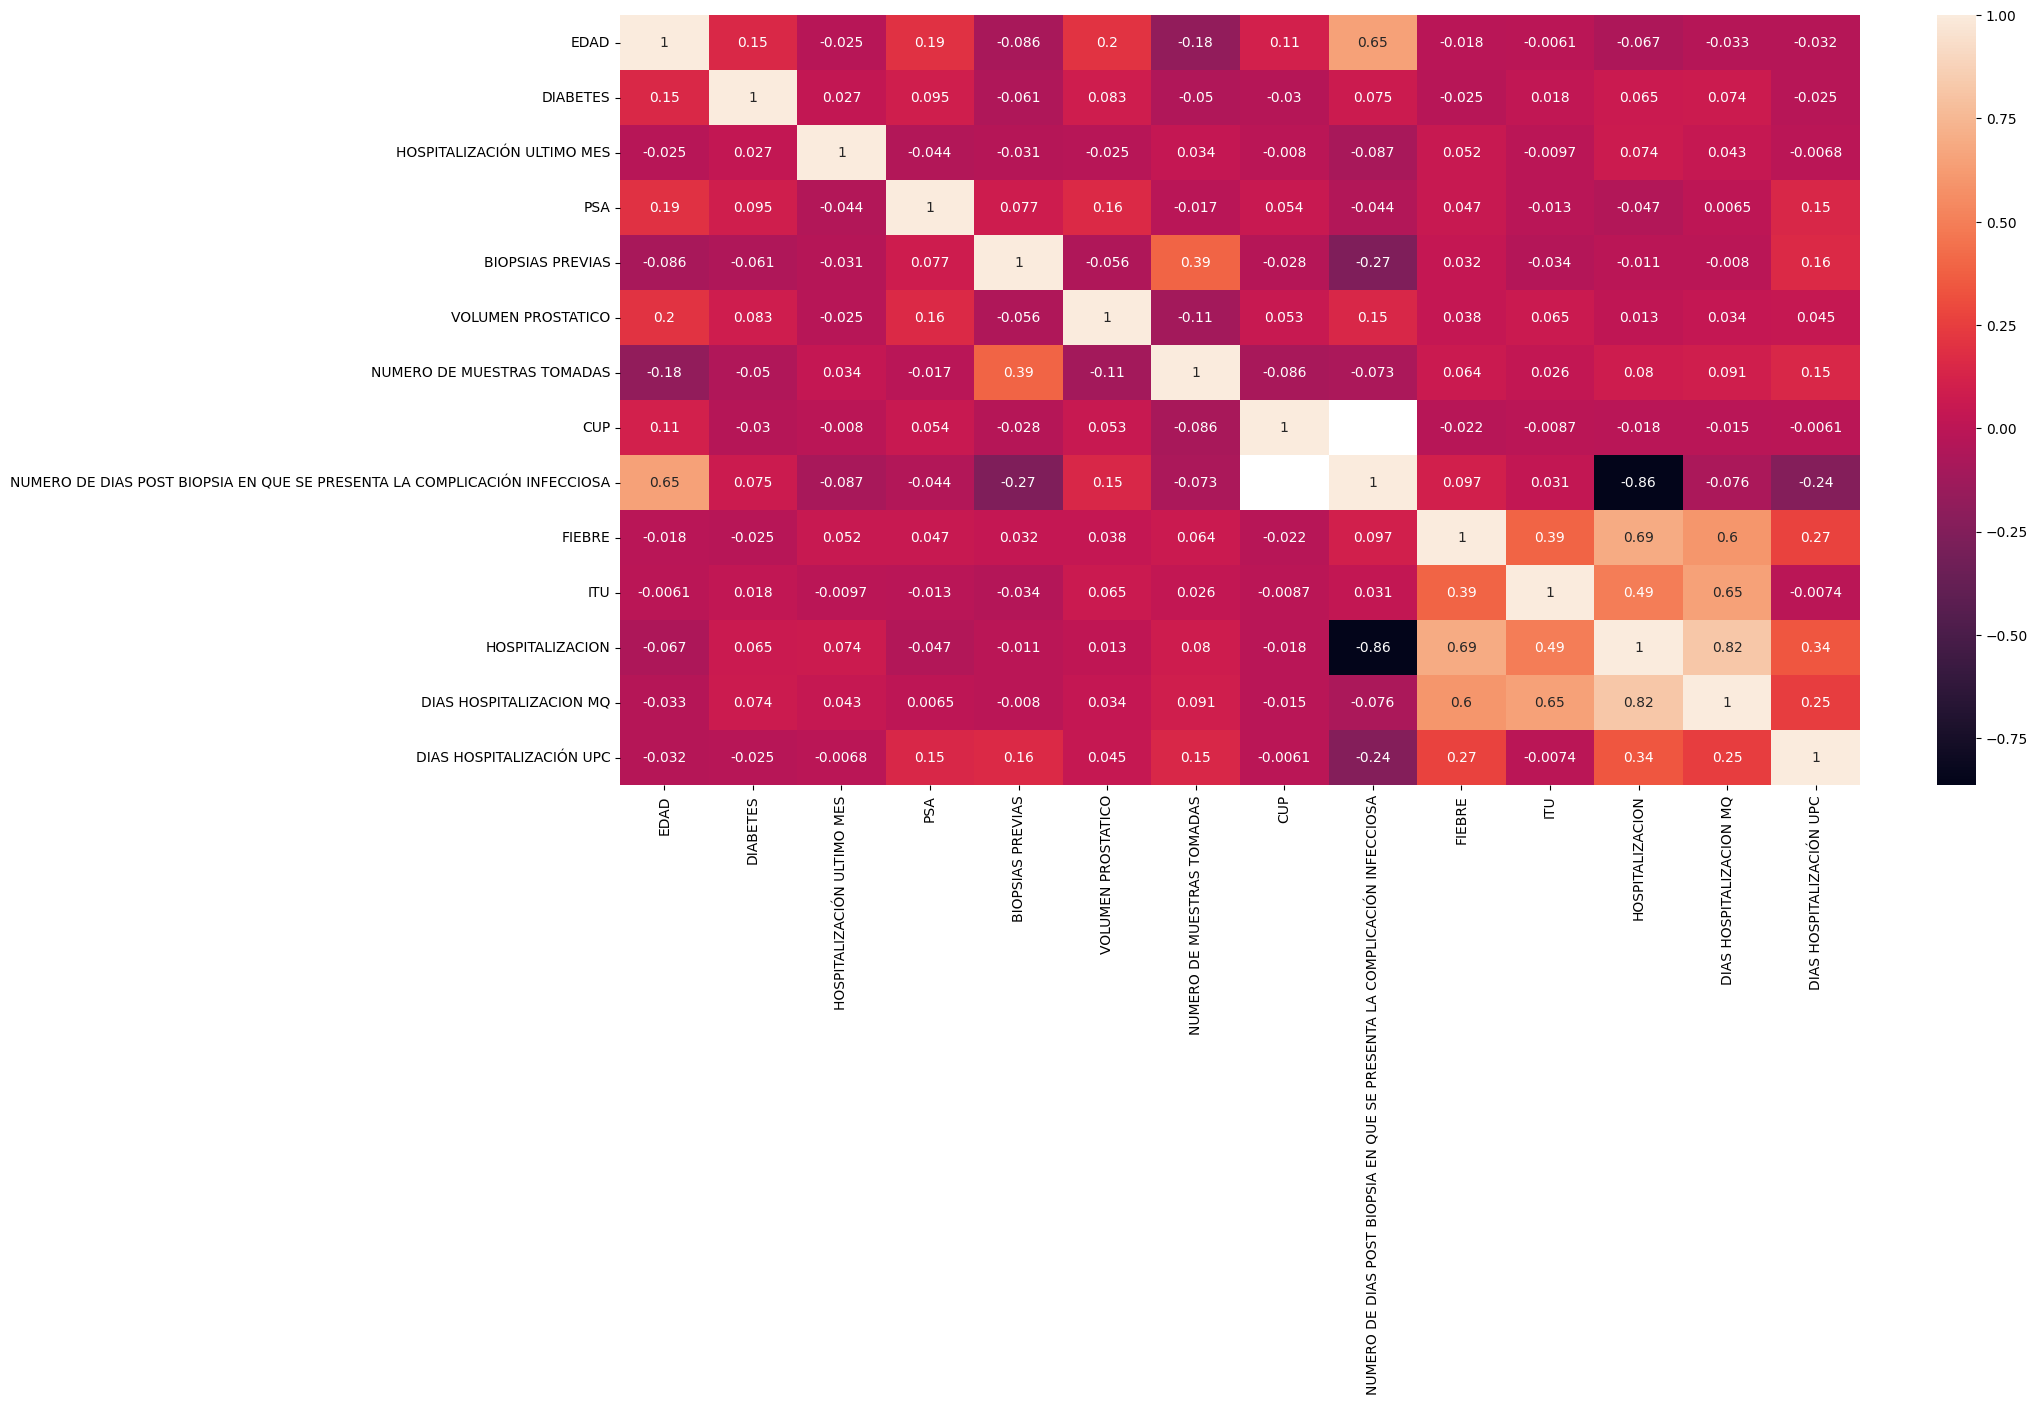

In [14]:
#grafico de las correlaciones
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [15]:
#eliminar la columna de dias despues de biopsia que aparece con correlacion negativa, eliminar fiebre e itu que con las variables con correlacion mas alta
df.drop(["NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA",'FIEBRE', 'ITU'], axis=1, inplace= True)


Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

In [16]:
#guardar en otra tabla los outliers de edad
df1=df[df["EDAD"]>122]
#encontrar la mediana para reemplazarla
df["EDAD"].median()

64.0

In [17]:
#reemplzar los valores con la media
df.loc[df["EDAD"]>122, "EDAD"]=64

Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

In [18]:
columns_names = df.columns.values
columns_names

array(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS',
       'NUMERO DE MUESTRAS TOMADAS', 'CUP', 'BIOPSIA', 'TIPO DE CULTIVO',
       'AGENTE AISLADO', 'PATRON DE RESISTENCIA', 'HOSPITALIZACION',
       'DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC'],
      dtype=object)

In [19]:
columns=['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS',
       'NUMERO DE MUESTRAS TOMADAS', 'CUP', 'BIOPSIA',
       'TIPO DE CULTIVO', 'AGENTE AISLADO',
       'PATRON DE RESISTENCIA', 'HOSPITALIZACION',
       'DIAS HOSPITALIZACION MQ', 'DIAS HOSPITALIZACIÓN UPC']
for i in columns:
    print(df[i].value_counts())
    

EDAD
69.0    39
64.0    33
63.0    32
68.0    31
66.0    29
67.0    29
62.0    29
71.0    27
59.0    27
61.0    26
58.0    25
65.0    21
60.0    21
57.0    19
55.0    14
73.0    14
70.0    13
56.0    13
53.0    13
54.0    12
75.0    12
74.0    11
52.0     9
81.0     7
51.0     6
78.0     6
42.0     6
50.0     5
77.0     5
72.0     4
79.0     4
47.0     4
49.0     3
76.0     3
84.0     3
45.0     2
39.0     2
82.0     2
46.0     2
48.0     2
43.0     1
80.0     1
44.0     1
Name: count, dtype: int64
DIABETES
0.0    505
1.0     63
Name: count, dtype: int64
HOSPITALIZACIÓN ULTIMO MES
0.0    563
1.0      5
Name: count, dtype: int64
PSA
8.00     53
6.00     31
7.00     27
5.00     20
10.00    15
         ..
27.60     1
9.50      1
10.20     1
5.19      1
4.43      1
Name: count, Length: 123, dtype: int64
BIOPSIAS PREVIAS
0.0    510
1.0     56
Name: count, dtype: int64
VOLUMEN PROSTATICO
1.0    408
0.0    159
Name: count, dtype: int64
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS
FLUOROQUINOLONA_A

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568 entries, 0 to 567
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   EDAD                                     568 non-null    float64
 1   DIABETES                                 568 non-null    float64
 2   HOSPITALIZACIÓN ULTIMO MES               568 non-null    float64
 3   PSA                                      564 non-null    float64
 4   BIOPSIAS PREVIAS                         566 non-null    float64
 5   VOLUMEN PROSTATICO                       567 non-null    float64
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS  568 non-null    object 
 7   NUMERO DE MUESTRAS TOMADAS               568 non-null    float64
 8   CUP                                      567 non-null    float64
 9   BIOPSIA                                  568 non-null    object 
 10  TIPO DE CULTIVO                          568 non-null  

Para el caso de las variables numéricas, ¿Es necesario normalizar?

In [149]:
#

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

In [21]:
#Fhay que cambiar algunos datos que estan escritos de forma diferente
df.replace("FLUOROQUINOLONA_AMINOGLICÓSIDO","FLUOROQUINOLONA_AMINOGLICOSIDO", inplace=True)

In [22]:
#ver como quedó
df["ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS"].value_counts()

ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS
FLUOROQUINOLONA_AMINOGLICOSIDO    452
CEFALOSPORINA_AMINOGLUCOCIDO       56
OTROS                              42
OROQUINOLONAS                      18
Name: count, dtype: int64

In [23]:
#cortar los espacios blanco de la columna biopsia
df["BIOPSIA"]=df["BIOPSIA"].str.strip()

In [24]:
#comprobar que se hayn unido los valores
df["BIOPSIA"].value_counts()

BIOPSIA
NEG                                           322
ADENOCARCINOMA GLEASON 7                      116
ADENOCARCINOMA GLEASON 6                       54
ADENOCARCINOMA GLEASON 8                       22
ADENOCARCINOMA GLEASON 9                       20
PROSTATITIS                                    14
HIPERPLASIA PROSTATICA                         14
ADENOCARCINOMA GLEASON 10                       4
CARCINOMA INDIFERENCIADO DE CELULAS CLARAS      2
Name: count, dtype: int64

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

In [25]:
#borrar las columnas con mas alta correlacion 'DIAS HOSPITALIZACION MQ',DIAS HOSPITALIZACIÓN UPC

df.drop(['DIAS HOSPITALIZACION MQ', "DIAS HOSPITALIZACIÓN UPC"], axis=1, inplace= True)

In [26]:
#ecnontrar la correlacion de las variablews numericas
numericas2=['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'NUMERO DE MUESTRAS TOMADAS', 'CUP',
       'HOSPITALIZACION']

corr2=df[numericas2].corr()

<AxesSubplot: >

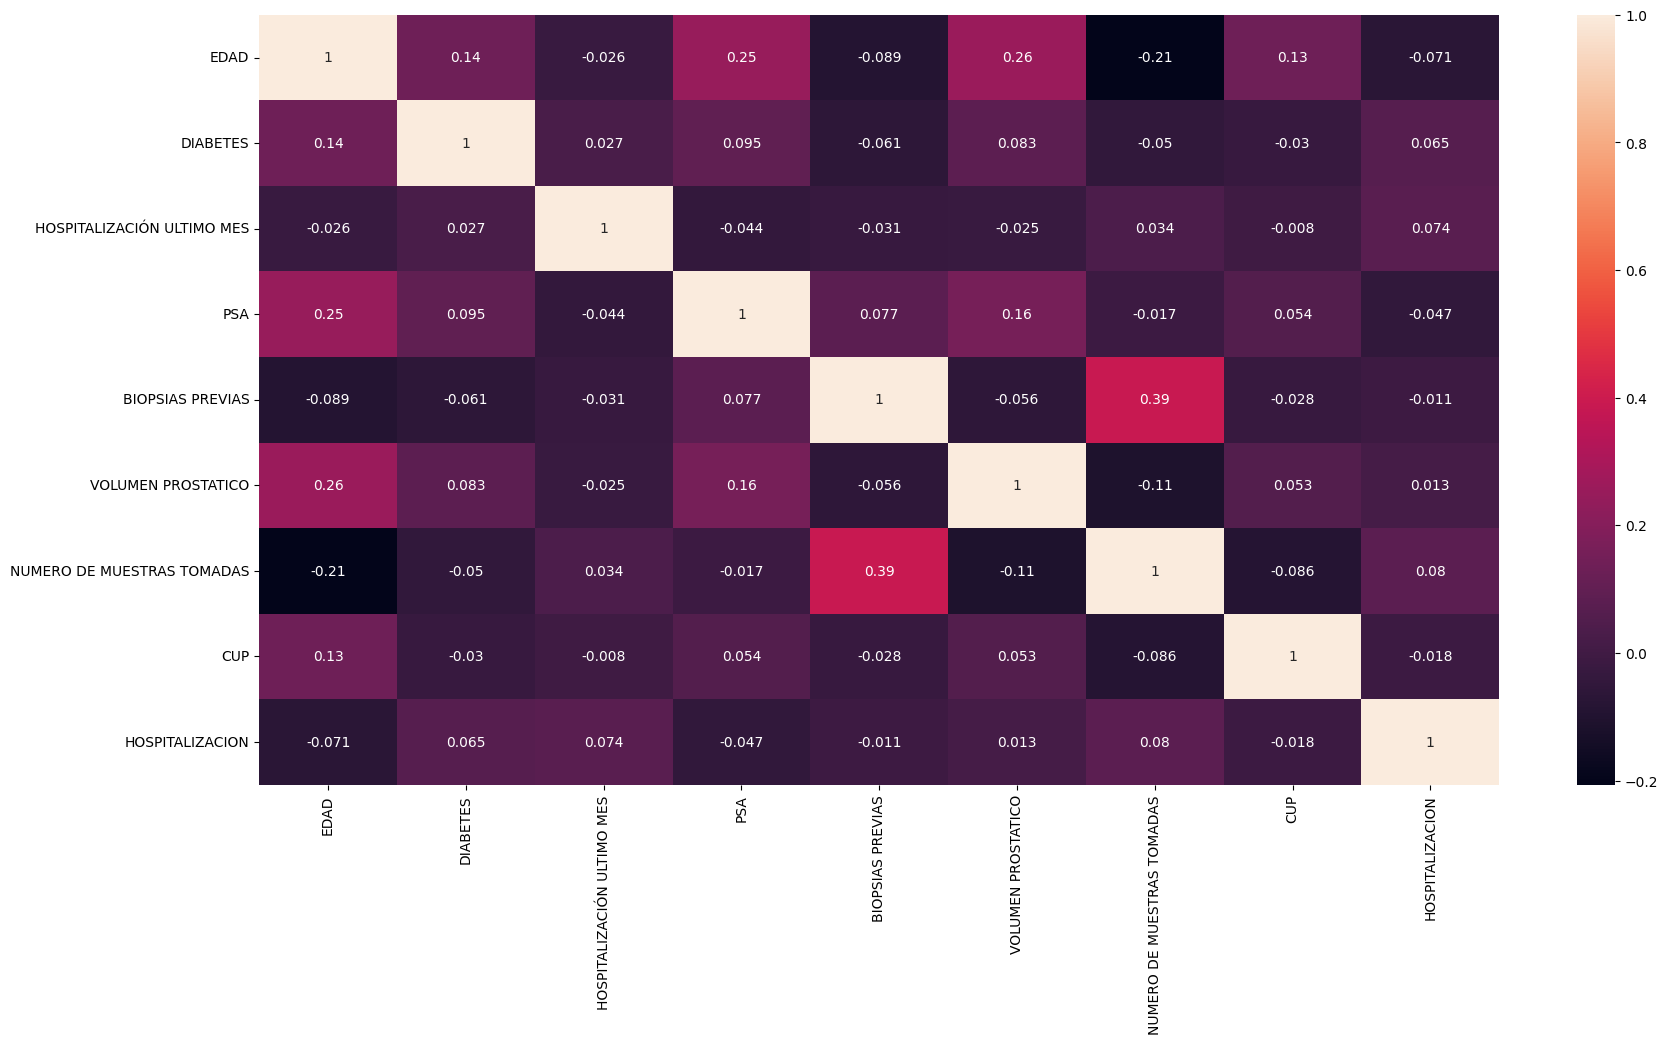

In [27]:
#grafico de las correlaciones
plt.figure(figsize=(20,10))
sns.heatmap(corr2,annot=True)

In [28]:
#hacer la funcion get dummies para las variables categoricas
dummy_t_cultivo=pd.get_dummies(df["TIPO DE CULTIVO"], prefix="TIPO_CULTIVO")
dummy_ag_aislado=pd.get_dummies(df["AGENTE AISLADO"], prefix="AGENTE_AISLADO")
dummy_patr_resist=pd.get_dummies(df["PATRON DE RESISTENCIA"], prefix="PATRON_RESISTENCIA")
dummy_antibio_prof=pd.get_dummies(df["ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS"], prefix="ANTIBIOTICO_PROFILAXIS")
dummy_biopsia=pd.get_dummies(df["BIOPSIA"], prefix="BIOPSIA")

In [29]:
#hacer que se añadan al df original
df=pd.concat([df,dummy_t_cultivo], axis=1)
df=pd.concat([df,dummy_ag_aislado], axis=1)
df=pd.concat([df,dummy_patr_resist], axis=1)
df=pd.concat([df,dummy_antibio_prof], axis=1)
df=pd.concat([df,dummy_biopsia], axis=1)

In [30]:
#borrar las columnas de dummies
df=df.drop(["TIPO DE CULTIVO","AGENTE AISLADO","PATRON DE RESISTENCIA","ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS","BIOPSIA"],axis=1)

In [31]:
#reemplazar los boleanos en la tabla con los dummies
df.replace({False:0,True:1}, inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568 entries, 0 to 567
Data columns (total 34 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   EDAD                                                                                                568 non-null    float64
 1   DIABETES                                                                                            568 non-null    float64
 2   HOSPITALIZACIÓN ULTIMO MES                                                                          568 non-null    float64
 3   PSA                                                                                                 564 non-null    float64
 4   BIOPSIAS PREVIAS                                                                                    566 non-null    float

In [33]:
#reemplazar los nan con las medianas PSA, BIOPSIAS PREVIAS, VOLUMEN PROSTATICO,CUP
df["PSA"].fillna(df["PSA"].median(), inplace=True)
df["BIOPSIAS PREVIAS"].fillna(df["BIOPSIAS PREVIAS"].median(), inplace=True)
df["VOLUMEN PROSTATICO"].fillna(df["VOLUMEN PROSTATICO"].median(), inplace=True)
df["CUP"].fillna(df["CUP"].median(), inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568 entries, 0 to 567
Data columns (total 34 columns):
 #   Column                                                                                              Non-Null Count  Dtype  
---  ------                                                                                              --------------  -----  
 0   EDAD                                                                                                568 non-null    float64
 1   DIABETES                                                                                            568 non-null    float64
 2   HOSPITALIZACIÓN ULTIMO MES                                                                          568 non-null    float64
 3   PSA                                                                                                 568 non-null    float64
 4   BIOPSIAS PREVIAS                                                                                    568 non-null    float

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [179]:
df.to_csv("BBDD_Hospitalización_sin balancear.csv",index=False)

In [37]:
#duplicar el dataframe por siacaso
df_pr=df.copy()

In [35]:
#relllenar los na con la media
df["HOSPITALIZACION"].fillna(df["HOSPITALIZACION"].median(), inplace=True)

In [38]:
#ahora a balancer el dataset
#dividimos los dataset en los que fueron hospitalizados y los que no
hospitalizados=df_pr[df_pr["HOSPITALIZACION"]==1]
no_hospitalizados=df_pr[df_pr["HOSPITALIZACION"]==0]

In [39]:
num_hosp=hospitalizados.iloc[:,0].size
num_no_hosp=no_hospitalizados.iloc[:,0].size

Text(0, 0.5, 'cantidad de personas')

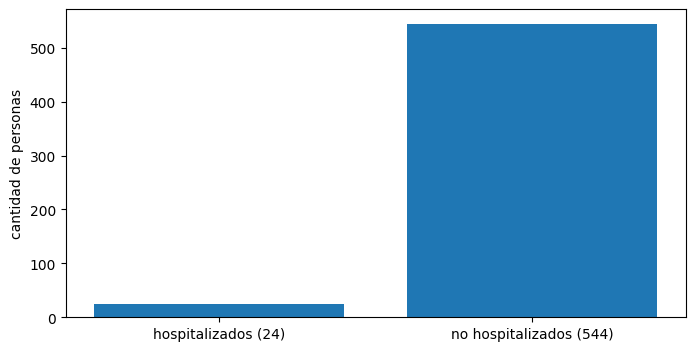

In [40]:
plt.figure(figsize=(8,4))
plt.bar(["hospitalizados (%d)" % num_hosp,"no hospitalizados (%d)" % num_no_hosp],[num_hosp,num_no_hosp])
plt.ylabel("cantidad de personas")


In [253]:
df.columns

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'NUMERO DE MUESTRAS TOMADAS',
       'CUP', 'HOSPITALIZACION', 'TIPO_CULTIVO_HEMOCULTIVO',
       'TIPO_CULTIVO_HEMOCULTIVO Y UROCULTIVO', 'TIPO_CULTIVO_NO',
       'TIPO_CULTIVO_UROCULTIVO', 'AGENTE_AISLADO_E.COLI', 'AGENTE_AISLADO_NO',
       'AGENTE_AISLADO_PSEUDOMONAS AERUGINOSA',
       'PATRON_RESISTENCIA_ AMPI R, CIPRO R, GENTA R, SULFA M R',
       'PATRON_RESISTENCIA_MULTI SENSIBLE', 'PATRON_RESISTENCIA_NO',
       'PATRON_RESISTENCIA_RESISTENTE A AMPI, CIPRO Y GENTA',
       'PATRON_RESISTENCIA_RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA',
       'ANTIBIOTICO_PROFILAXIS_CEFALOSPORINA_AMINOGLUCOCIDO',
       'ANTIBIOTICO_PROFILAXIS_FLUOROQUINOLONA_AMINOGLICOSIDO',
       'ANTIBIOTICO_PROFILAXIS_OROQUINOLONAS', 'ANTIBIOTICO_PROFILAXIS_OTROS',
       'BIOPSIA_ADENOCARCINOMA GLEASON 10', 'BIOPSIA_ADENOCARCINOMA GLEASON 6',
       'BI

In [41]:
#importar la libreria para hacer el oversapling
from imblearn import over_sampling, under_sampling 

In [42]:
#establecer las variables
X=df
y=df.iloc[:,8]
X.drop(["HOSPITALIZACION"], axis=1, inplace=True)


In [43]:

from imblearn.over_sampling import RandomOverSampler
# Crear el objeto de oversampling
ros = RandomOverSampler(random_state=0)
# Aplicar el oversampling a las características y la variable objetivo
X_oversampled, y_oversampled = ros.fit_resample(X, y)


In [44]:
# Crear un nuevo DataFrame con las características oversampleadas y la variable objetivo
df_oversampled = pd.concat([X_oversampled, y_oversampled], axis=1)

df_oversampled.shape

(1088, 34)

In [45]:
from imblearn.under_sampling import RandomUnderSampler
# Crear el objeto de undersampling
rus = RandomUnderSampler(random_state=0)
# Aplicar el oversampling a las características y la variable objetivo
X_undersampled, y_undersampled = rus.fit_resample(X, y)
# Crear un nuevo DataFrame con las características oversampleadas y la variable objetivo
df_undersampled = pd.concat([X_undersampled, y_undersampled], axis=1)

df_undersampled.shape


(48, 34)

In [280]:
df_oversampled.to_csv("BBDD_Hospitalización_sobremuestreo.csv",index=False)

In [281]:
df_undersampled.to_csv("BBDD_Hospitalización_submuestreo.csv",index=False)